✅ Sample Data:
   Area  Room  Parking  Warehouse  Elevator         Address       Price  \
0   63     1     True       True      True         Shahran  1850000000   
1   60     1     True       True      True         Shahran  1850000000   
2   79     2     True       True      True          Pardis   550000000   
3   95     2     True       True      True   Shahrake Qods   902500000   
4  123     2     True       True      True  Shahrake Gharb  7000000000   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  
📐 Shape: (3479, 8)
🧾 Columns: Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')
🔍 Missing values:
 Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64
🔍 Model Comparison Results:

               Model      R2 Score           MAE          RMSE
5            XGBoost  5.879129

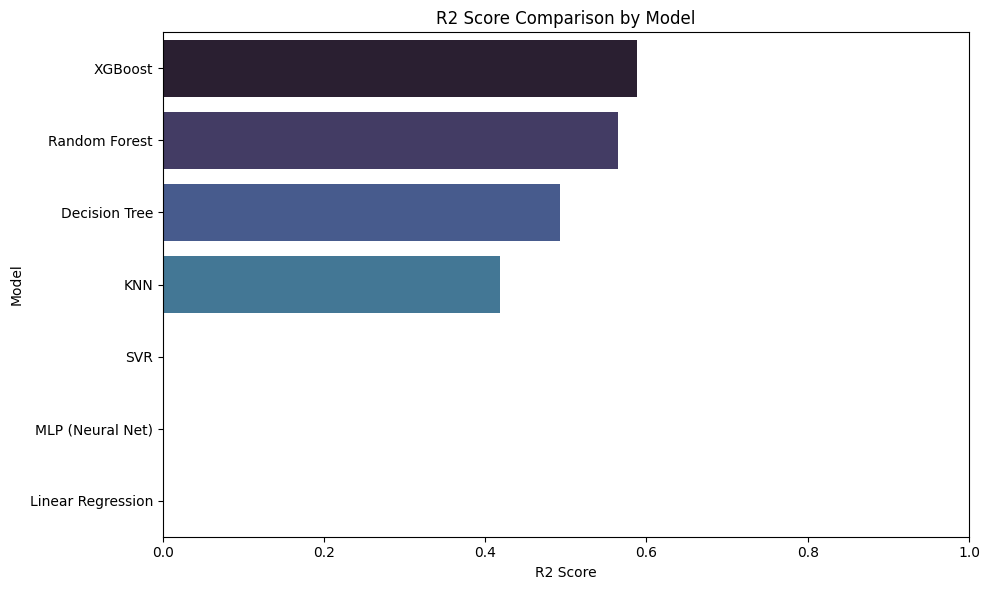

In [1]:
# 🏠 Tehran House Price Prediction

# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

warnings.filterwarnings("ignore")

# 📥 Load Dataset
df = pd.read_csv("tehranhouses.csv")
print("✅ Sample Data:\n", df.head())

# 🧹 Data Cleaning
print("📐 Shape:", df.shape)
print("🧾 Columns:", df.columns)
print("🔍 Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)

# 🎯 Feature & Target Selection
X = df.drop(['Price', 'Price(USD)'], axis=1)
y = df['Price']
X = pd.get_dummies(X, drop_first=True)

# ✂️ Split & Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Train & Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
    "MLP (Neural Net)": MLPRegressor(max_iter=1000),
}

results = []
for name, model in models.items():
    if name in ["KNN", "SVR", "MLP (Neural Net)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
    })

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("🔍 Model Comparison Results:\n")
print(results_df)

# 📊 Plot R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="R2 Score", y="Model", data=results_df, palette="mako")
plt.title("R2 Score Comparison by Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
